<a href="https://colab.research.google.com/github/381706-1Mityagina/Trying-to-understand-NN/blob/master/autoencoder_try_n_one.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

from keras.datasets import mnist
import numpy as np

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test  = x_test .astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1))

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


Данный файл содержит реализацию автоэнкодера, приведенную в 
статье https://habr.com/ru/post/331382/ ("Автоэнкодеры в Keras, Часть 1: Введение")
Практическая часть курсовой работы. Начало.

In [0]:
from keras.layers import Input, Dense, Flatten, Reshape
from keras.models import Model

def create_dense_ae():
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,))
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded)
    decoded = Reshape((28, 28, 1))(flat_decoded)

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    decoder = Model(input_encoded, decoded, name="decoder")
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder

In [0]:
encoder, decoder, autoencoder = create_dense_ae()
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [0]:
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
encoder (Model)              (None, 49)                38465     
_________________________________________________________________
decoder (Model)              (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [0]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))




Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 5s 78us/step - loss: 0.2580 - val_loss: 0.1750
Epoch 2/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.1551 - val_loss: 0.1369
Epoch 3/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1277 - val_loss: 0.1177
Epoch 4/10
60000/60000 [==============================] - 4s 66us/step - loss: 0.1123 - val_loss: 0.1054
Epoch 5/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.1021 - val_loss: 0.0970
Epoch 6/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0952 - val_loss: 0.0914
Epoch 7/10
60000/60000 [==============================] - 4s 63us/step - loss: 0.0903 - val_loss: 0.0873
Epoch 8/10
60000/60000 [==============================] - 4s 64us/step - loss: 0.0868 - val_loss: 0.0846
Epoch 9/10
60000/60000 [==============================] - 4s 68us/step - loss: 0.0844 - val_loss: 0.08

In [0]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

def plot_digits(*args):
    args = [x.squeeze() for x in args]
    n = min([x.shape[0] for x in args])
    
    plt.figure(figsize=(2*n, 2*len(args)))
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1)
            plt.imshow(args[i][j])
            plt.gray()
            ax.get_xaxis().set_visible(False)
            ax.get_yaxis().set_visible(False)

    plt.show()

In [0]:
n = 10

imgs = x_test[:n]
encoded_imgs = encoder.predict(imgs, batch_size=n)
encoded_imgs[0]

array([ 4.5203967 ,  9.1329775 ,  5.9673147 ,  4.170228  ,  6.974074  ,
        6.366394  ,  1.097224  ,  8.498376  ,  7.1316576 ,  4.861009  ,
        5.0954204 ,  5.208288  ,  0.6066055 ,  5.738133  ,  0.12167645,
        4.223877  ,  5.2569313 ,  4.557839  ,  5.236565  ,  6.8687763 ,
        8.923111  ,  9.5498905 ,  0.88414115,  3.5614793 ,  4.315438  ,
        3.606779  ,  4.2621717 ,  3.2255347 ,  5.0210714 ,  8.835248  ,
        4.0411882 ,  7.499459  ,  2.5557332 ,  0.        ,  0.22857499,
        5.904037  ,  0.54406434,  3.700069  ,  6.1713605 ,  9.022093  ,
        7.122306  ,  4.042222  ,  4.499539  ,  5.242981  ,  3.1365964 ,
        9.25601   ,  2.7493143 ,  5.535339  , 11.932426  ], dtype=float32)

In [0]:
# array([  6.64665604,   7.53528595,   3.81508064,   4.66803837,
#          1.50886345,   5.41063929,   9.28293324,  10.79530716,
#          0.39599913,   4.20529413,   6.53982353,   5.64758158,
#          5.25313473,   1.37336707,   9.37590599,   6.00672245,
#          4.39552879,   5.39900637,   4.11449528,   7.490417  ,
#         10.89267063,   7.74325705,  13.35806847,   3.59005809,
#          9.75185394,   2.87570286,   3.64097357,   7.86691713,
#          5.93383646,   5.52847338,   3.45317888,   1.88125253,
#          7.471385  ,   7.29820824,  10.02830505,  10.5430584 ,
#          3.2561543 ,   8.24713707,   2.2687614 ,   6.60069561,
#          7.58116722,   4.48140812,   6.13670635,   2.9162209 ,
#          8.05503941,  10.78182602,   4.26916027,   5.17175484,   6.18108797], dtype=float32)

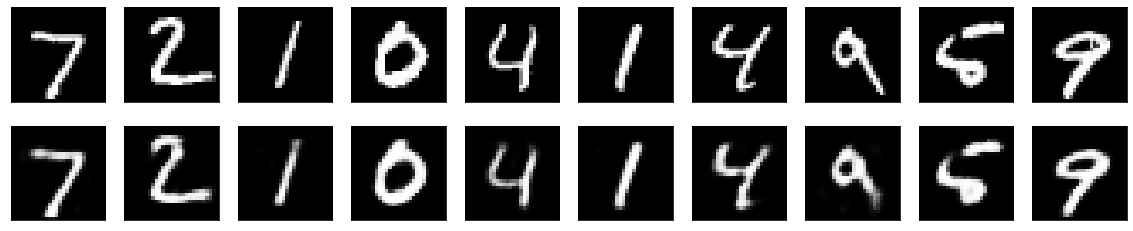

In [0]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n)

plot_digits(imgs, decoded_imgs)



Применение : 
1. Извлечения зависимостей в данных: автоэнкодеры пытаются минимизировать ошибку восстановления. 
В процессе уменьшения ошибки он изучает некоторые важные зависимости, присутствующие во входных данных. 
Он восстанавливает входные данные из кодированного состояния. Кодирование генерирует новый набор функций, 
который представляет собой комбинацию оригинальных зависимостей. Кодирование в автоэнкодерах помогает 
идентифицировать скрытые зависимости, присутствующие во входных данных.
2. Распознавание изображений: для распознавания изображений используется сложный автоэнкодер. 
Можно использовать несколько совмещенных кодировщиков, что помогает изучить различные функции изображения.